# Week 2 — Day 1: Best-Selling Products & Categories
**Objective:** Identify the top-selling products and categories based on order quantities and revenue.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset from Week 1
file_path = r"C:\Users\Durga\Desktop\Career 2025\MeriSkill\Order_Data_Cleaned.csv"
df = pd.read_csv(file_path)
df.head()

C:\Users\Durga\AppData\Local\Temp\ipykernel_11800\1698500443.py:7: DtypeWarning: Columns (3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender
0,SO45080,Northwest,United States,14657,JOHN THOMAS,BK-R50B-58,Plants,1,1.0,413.1463,699.0982,01-01-2020,Meta-ads\r,I4127227587819694,False,CREDITCARD,DISCOVER,M
1,SO45079,Southwest,United States,29255,KYLE WASHINGTON,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,01-01-2020,Google-ads\r,E9525730529761877,False,CREDITCARD,MC,M
2,SO45082,Australia,Australia,11455,ROSS SANZ,BK-M82B-44,Plants,1,1.0,1898.0944,3374.99,01-01-2020,Google-ads\r,Z6376643485803420,False,CREDITCARD,VISA,M
3,SO45081,Canada,Canada,26782,SETH LEWIS,BK-R50B-44,Plants,1,1.0,413.1463,699.0982,01-01-2020,Google-ads\r,R8609290025411138,False,CREDITCARD,VISA,M
4,SO45083,United Kingdom,United Kingdom,14947,ALEJANDRO CHEN,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,02-01-2020,Meta-ads\r,Y9572700698484288,False,CREDITCARD,VISA,M


In [7]:
# Ensure price and cost are numeric
df['ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce')
df['OrderQuantity'] = pd.to_numeric(df['OrderQuantity'], errors='coerce')

# Calculate revenue per order line
df['Revenue'] = df['ProductPrice'] * df['OrderQuantity']

In [9]:
top_products = df.groupby('ProductSKU').agg(
    total_quantity=('OrderQuantity', 'sum'),
    total_revenue=('Revenue', 'sum')
).sort_values(by='total_quantity', ascending=False).head(10)

top_products

,total_quantity,total_revenue
ProductSKU,,
WB-H098,7936.0,39600.6400
PK-7098,5881.0,13467.4900
TT-M928,5656.0,28223.4400
TT-R982,4317.0,17224.8300
CA-1098,4138.0,35769.6996
FE-6654,3947.0,86755.0600
BC-M005,3794.0,37902.0600
BC-R205,3320.0,29846.8000
TT-T092,2739.0,13667.6100


C:\Users\Durga\AppData\Local\Temp\ipykernel_11800\3953441608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products['total_quantity'], palette='rocket')


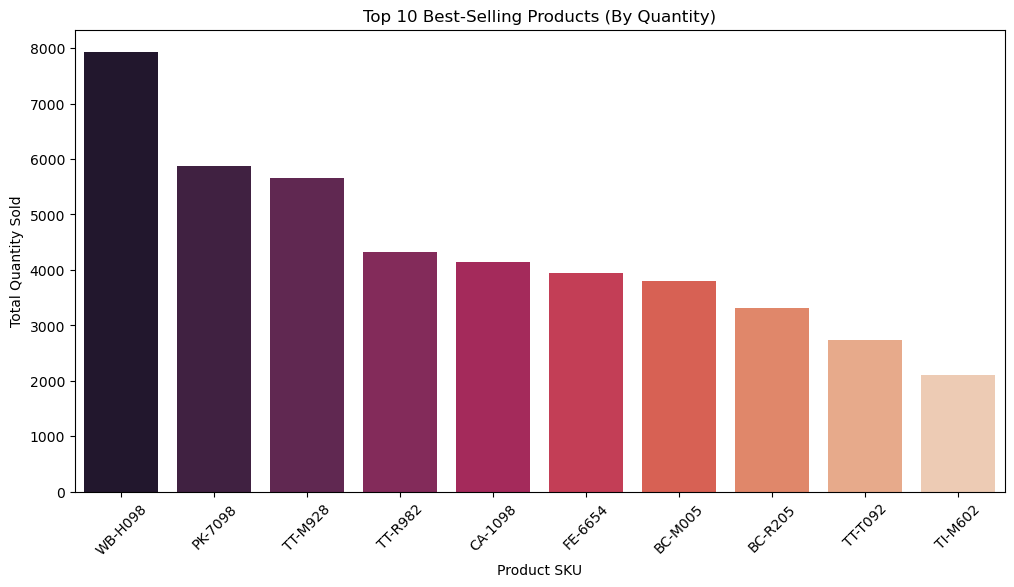

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.index, y=top_products['total_quantity'], palette='rocket')
plt.title('Top 10 Best-Selling Products (By Quantity)')
plt.xlabel('Product SKU')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [13]:
top_categories = df.groupby('Product_Category').agg(
    total_quantity=('OrderQuantity', 'sum'),
    total_revenue=('Revenue', 'sum')
).sort_values(by='total_revenue', ascending=False)

top_categories

,total_quantity,total_revenue
Product_Category,,
Plants,13913.0000,2.362228e+07
Plant Care & Seeds,57634.0000,9.039807e+05
Pots,12406.0000,3.647166e+05
3,1.8663,0.000000e+00


In [50]:
# Remove rows with incorrect Product_Category values
df = df[df['Product_Category'] != '3']

# First, create a new column for Revenue
df['Revenue'] = df['OrderQuantity'] * df['ProductPrice']

# Then group and plot
top_categories = df.groupby('Product_Category').agg(total_revenue=('Revenue', 'sum')).sort_values('total_revenue', ascending=False)

# Check unique categories
print(df['Product_Category'].unique())

['Plants' 'Plant Care & Seeds' 'Pots']


C:\Users\Durga\AppData\Local\Temp\ipykernel_11800\1907639302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories['total_revenue'], palette='mako')


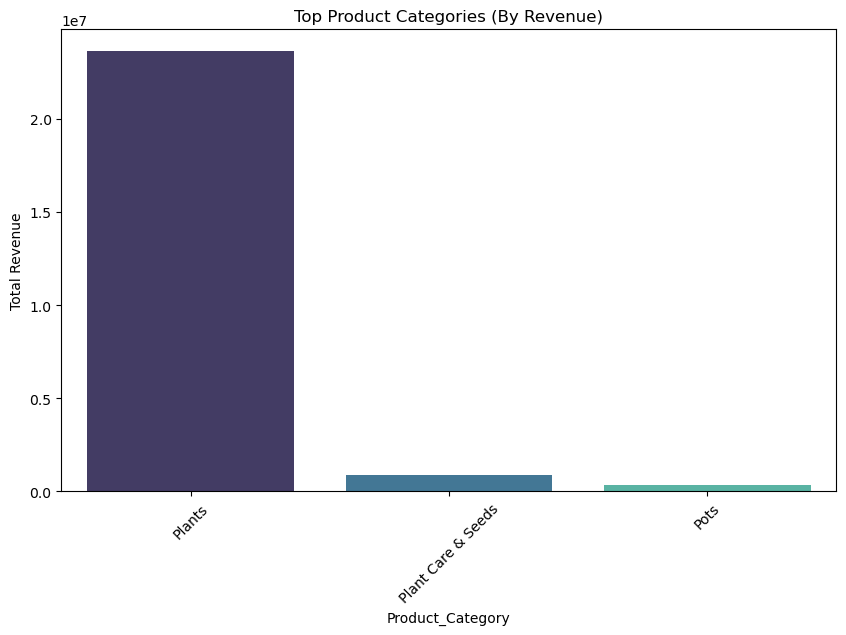

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.index, y=top_categories['total_revenue'], palette='mako')
plt.title('Top Product Categories (By Revenue)')
plt.xlabel('Product_Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

## Key Findings from Product Sales Analysis

### Top-Selling Products by Quantity:
- **WB-H098** is the highest-selling product with 7,936 units sold, contributing significantly to sales volume.
- Other top products include **PK-T098, TT-M928, TT-R982**, each with over 4,000+ units sold.
- While **TI-M602** ranks 10th in quantity sold, it generates the highest revenue per unit.

### Revenue Insights by Product Category:
- **Plants** dominate the revenue with over **$23 million**, despite lower quantity compared to other categories, indicating higher pricing or premium products.
- **Plant Care & Seeds** have the highest quantity sold but generate less revenue, suggesting lower margins or cheaper products.
- **Pots** category generates the least revenue and quantity.

### Business Insights:
- Focus marketing efforts on **Plant category** for high-revenue products.
- Explore cross-selling opportunities between **Plant Care & Seeds** and **Plants**, given the high volume of accessory products.
- Analyze if underperforming SKUs like **TI-M602** (low quantity but high revenue) need better promotions or are serving a niche premium market.
- Review low-performing categories like **Pots** for either discontinuation or repositioning.
